In [54]:
#  Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import sklearn.metrics as mt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.ensemble import GradientBoostingRegressor
import sklearn.metrics as metrics

In [55]:
# Load data
train_data = pd.read_csv('Train_UWu5bXk.csv')
test_data = pd.read_csv('Test_u94Q5KV.csv')

In [56]:
# Explore train data
train_data.tail()
train_data.describe()
train_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

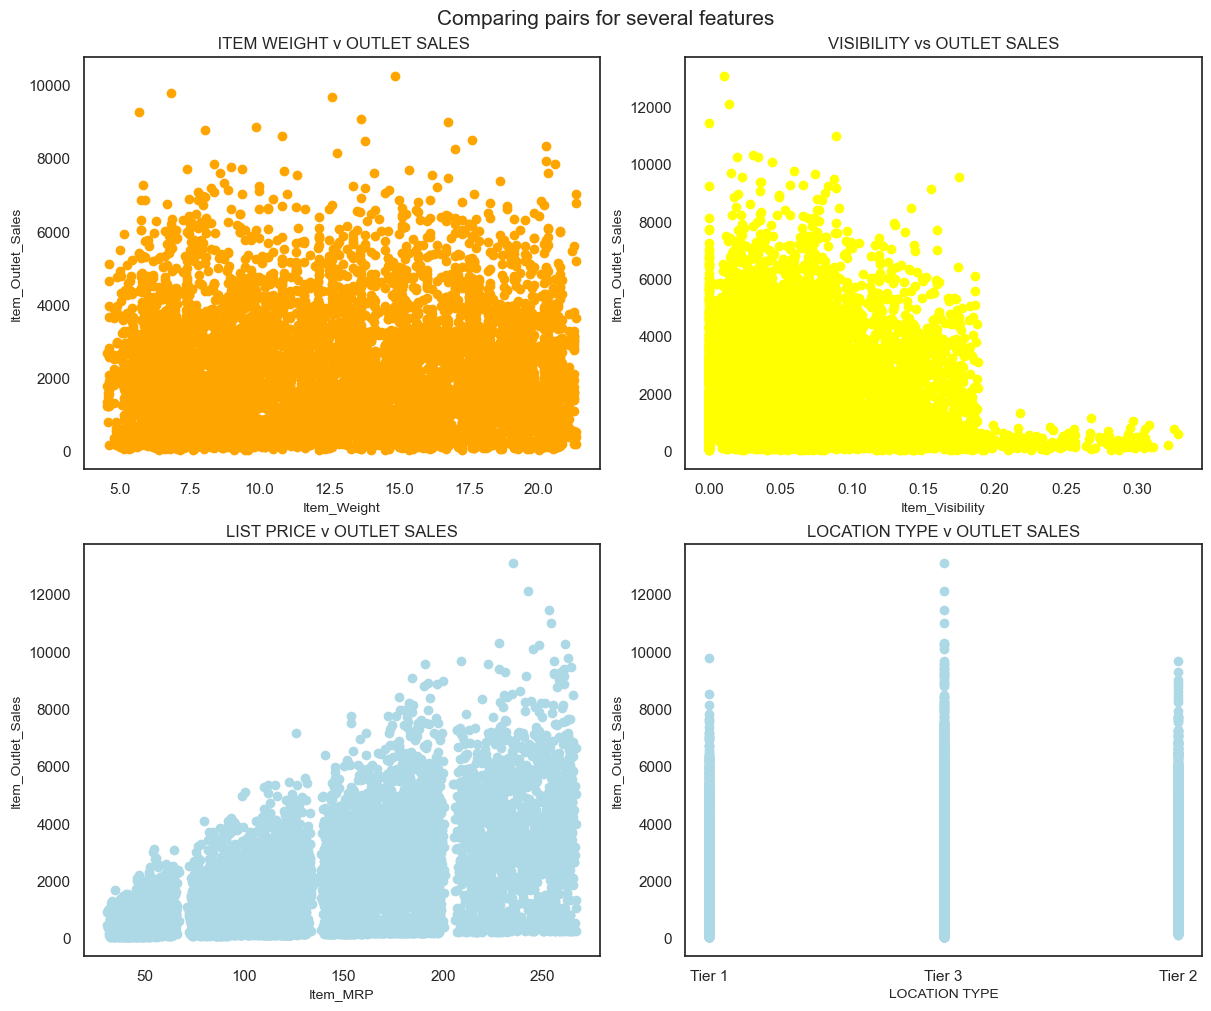

In [57]:
# Exploratory Data Analysis
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10), constrained_layout=True)
fig.suptitle('Comparing pairs for several features', size=15)

ax1.scatter(train_data.Item_Weight, train_data.Item_Outlet_Sales, c='orange', marker='o')
ax1.title.set_text(' ITEM WEIGHT v OUTLET SALES')
ax1.set_xlabel('Item_Weight', fontsize=10)
ax1.set_ylabel('Item_Outlet_Sales', fontsize=10)

ax2.scatter(train_data.Item_Visibility, train_data.Item_Outlet_Sales, c='yellow', marker='o')
ax2.title.set_text('VISIBILITY vs OUTLET SALES')
ax2.set_xlabel('Item_Visibility', fontsize=10)
ax2.set_ylabel('Item_Outlet_Sales', fontsize=10)

ax3.scatter(train_data.Item_MRP, train_data.Item_Outlet_Sales, c='lightblue', marker='o')
ax3.title.set_text('LIST PRICE v OUTLET SALES')
ax3.set_xlabel('Item_MRP', fontsize=10)
ax3.set_ylabel('Item_Outlet_Sales', fontsize=10)

ax4.scatter(train_data.Outlet_Location_Type, train_data.Item_Outlet_Sales, c='lightblue', marker='o')
ax4.title.set_text('LOCATION TYPE v OUTLET SALES')
ax4.set_xlabel('LOCATION TYPE', fontsize=10)
ax4.set_ylabel('Item_Outlet_Sales', fontsize=10)

plt.show()

In [58]:
# Check for missing values and duplicates
train_data.isnull().sum()
dupes = train_data.duplicated()
print("# of duplicated rows =", dupes.sum())

# of duplicated rows = 0


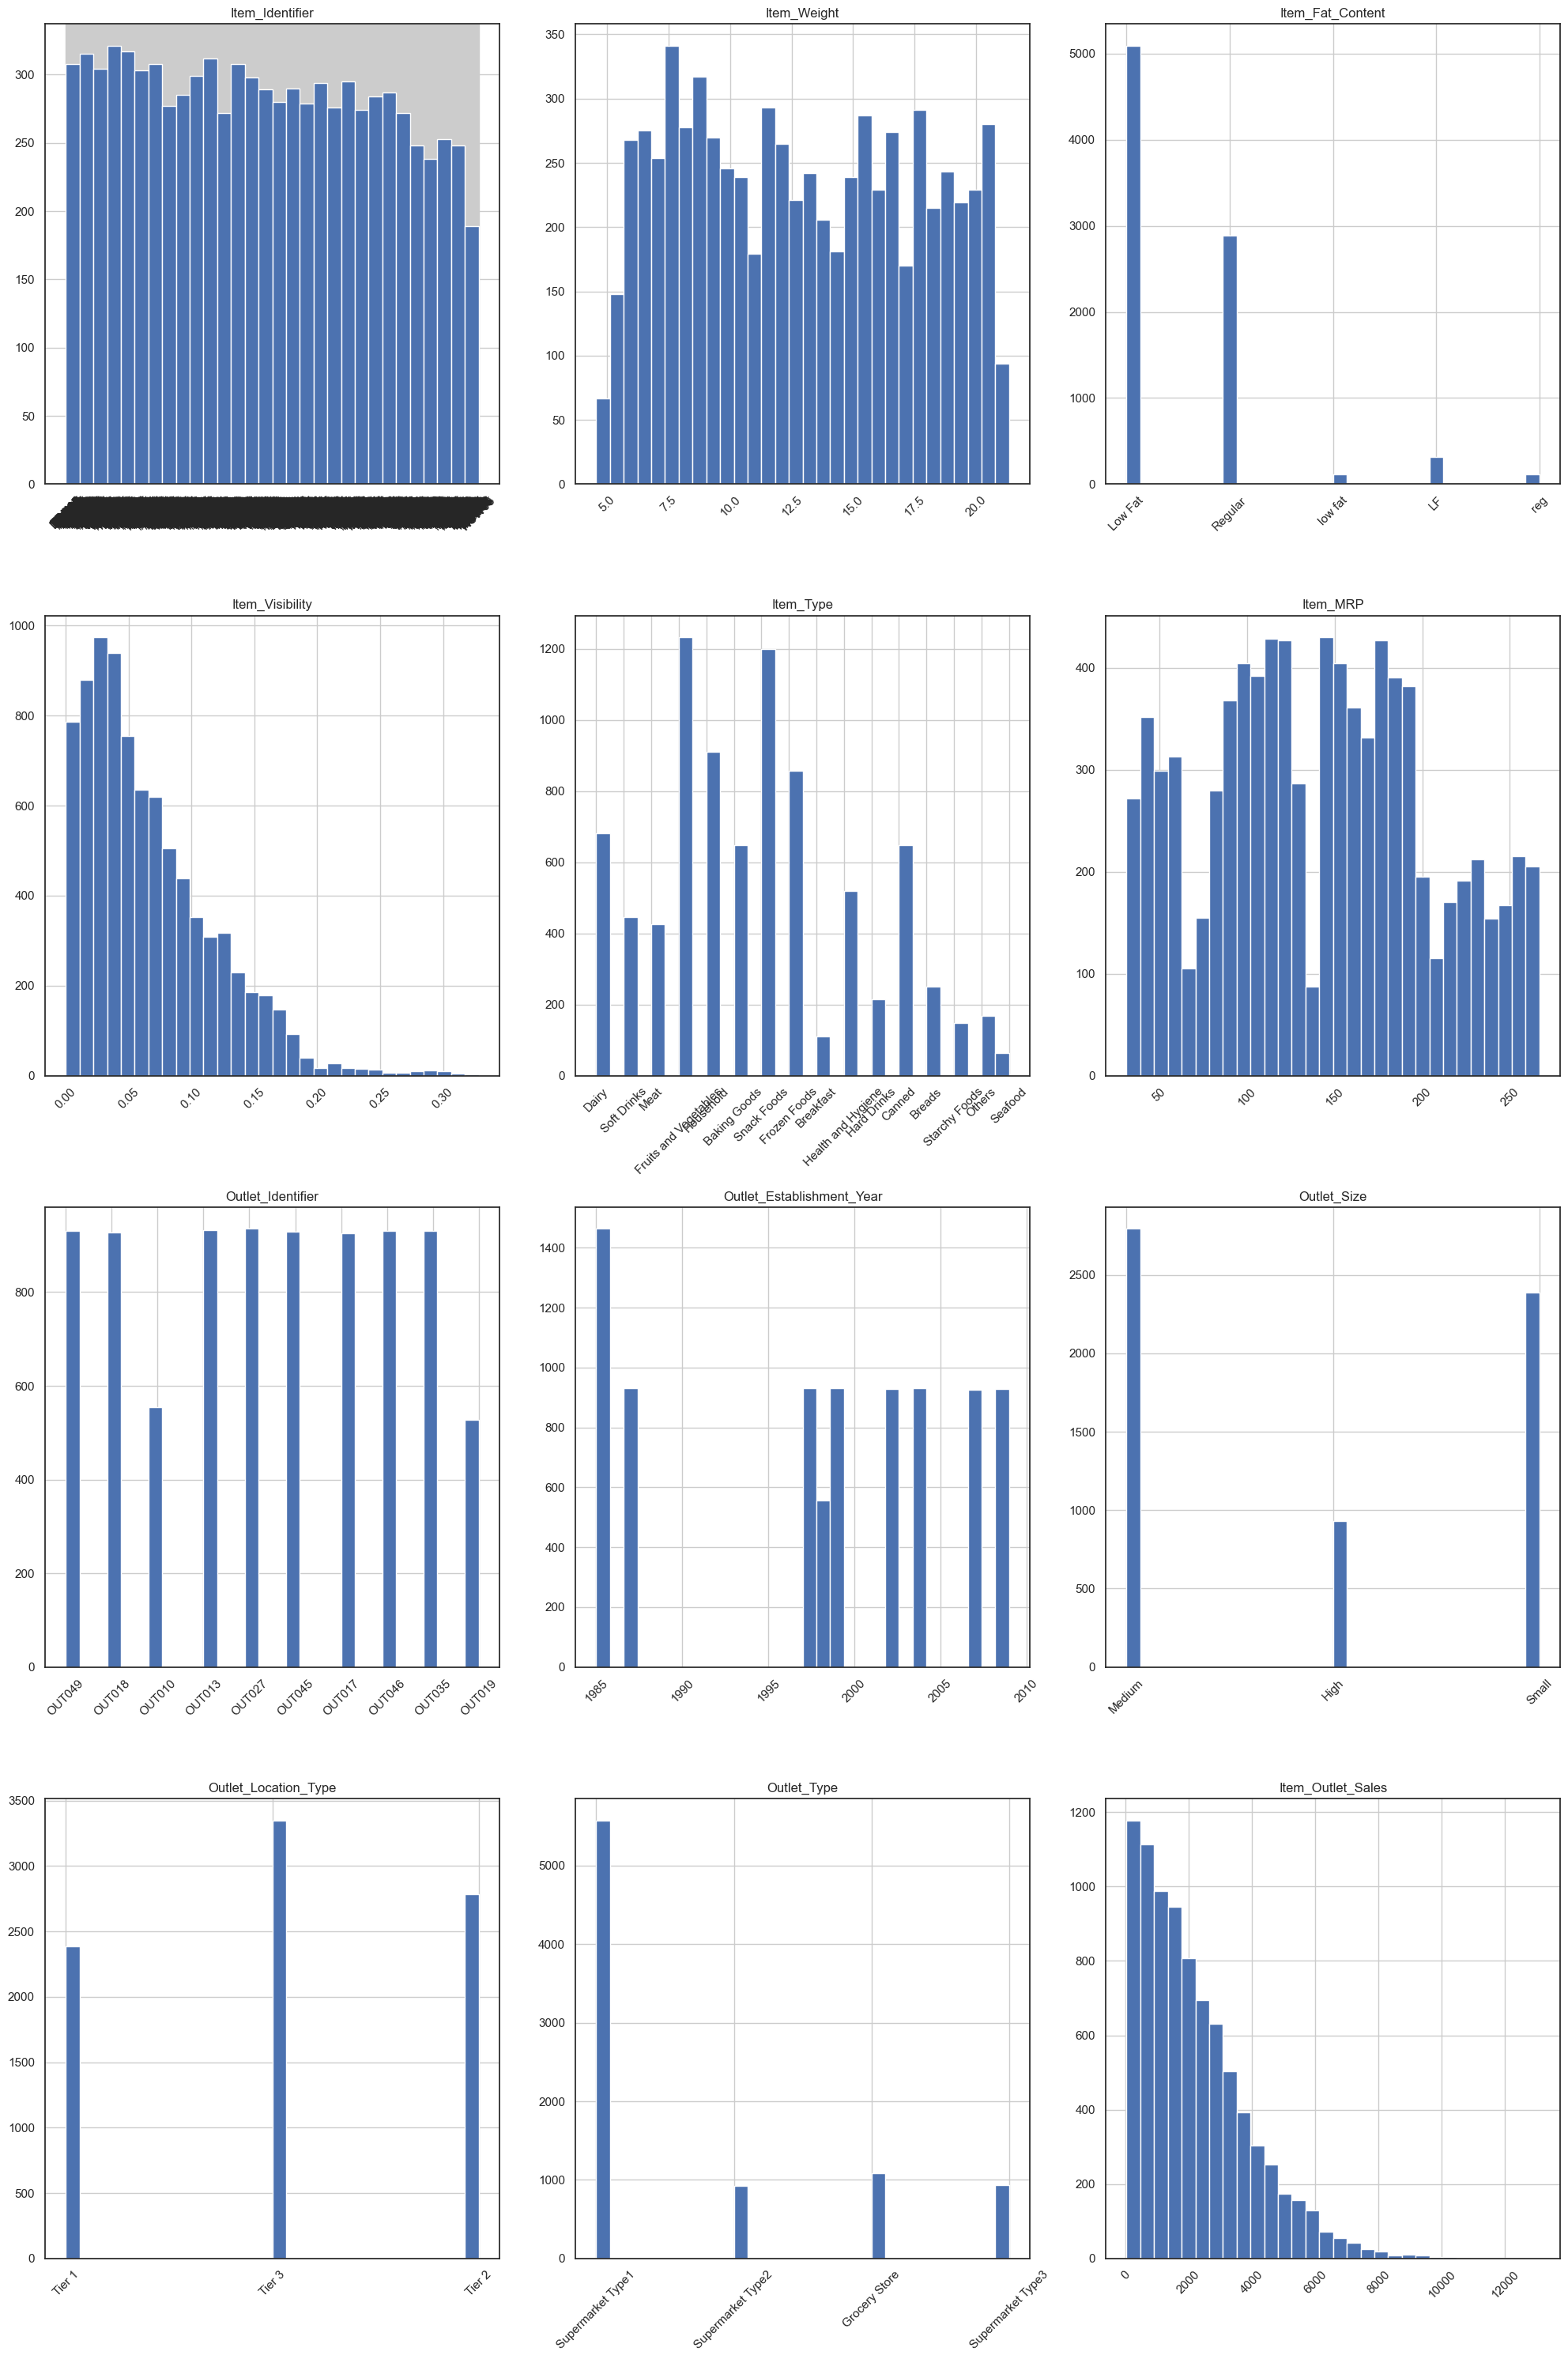

In [59]:
# Histograms 

def plot_feature_histograms(data, figsize=(20, 30)):
    # Get the number of features
    n_features = data.shape[1]
    
    # Calculate the number of rows and columns for the subplots
    n_cols = 3
    n_rows = (n_features - 1) // n_cols + 1
    
    # Create the figure and axes
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    
    # Flatten the axes array for easier indexing
    axes = axes.flatten()
    
    # Plot histograms for each feature
    for i, column in enumerate(data.columns):
        ax = axes[i]
        data[column].hist(ax=ax, bins=30)
        ax.set_title(column)
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=45)
    
    # Remove any unused subplots
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

# Create histograms for all features
plot_feature_histograms(train_data)

In [60]:
# Handle Missing Values and Encode Categorical Variables
from sklearn.preprocessing import LabelEncoder

# Handle missing values
train_data['Item_Weight'] = train_data.groupby('Item_Identifier')['Item_Weight'].transform(lambda x: x.fillna(x.median()))

def fill_outlet_size(group):
    if group.notna().any():
        return group.fillna(group.mode().iloc[0])
    else:
        return group

train_data['Outlet_Size'] = train_data.groupby('Outlet_Identifier')['Outlet_Size'].transform(fill_outlet_size)
train_data['Outlet_Size'] = train_data['Outlet_Size'].fillna(train_data['Outlet_Size'].mode().iloc[0])
train_data['Item_Weight'] = train_data['Item_Weight'].fillna(train_data['Item_Weight'].median())

# Encode categorical variables
le = LabelEncoder()
categorical_columns = ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
for col in categorical_columns:
    train_data[col] = le.fit_transform(train_data[col].astype(str))

# Check remaining missing values
print(train_data.isnull().sum())

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


In [61]:
# : Clean and Encode Categorical Variables 
train_data['Item_Fat_Content'] = train_data['Item_Fat_Content'].replace({"LF": "Low Fat", "reg": "Regular", "low fat": "Low Fat"})


In [62]:
# fEature Engineering 
first_year = train_data['Outlet_Establishment_Year'].min()
train_data['Outlet_Establishment_Year'] = train_data['Outlet_Establishment_Year'] - first_year

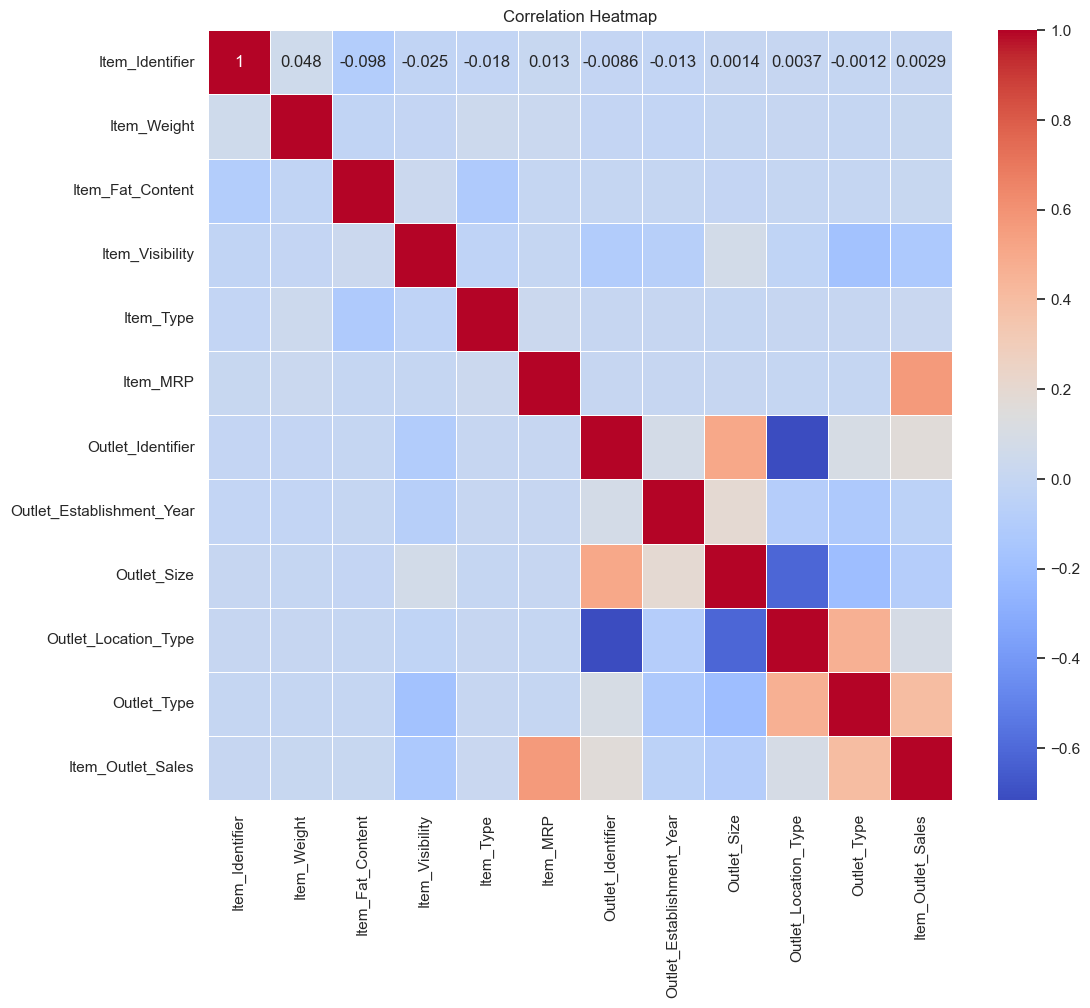

In [63]:
#  Correlation Plot
correlation_matrix = train_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

C:\Users\Evans Sarker\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Evans Sarker\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Evans Sarker\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Evans Sarker\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

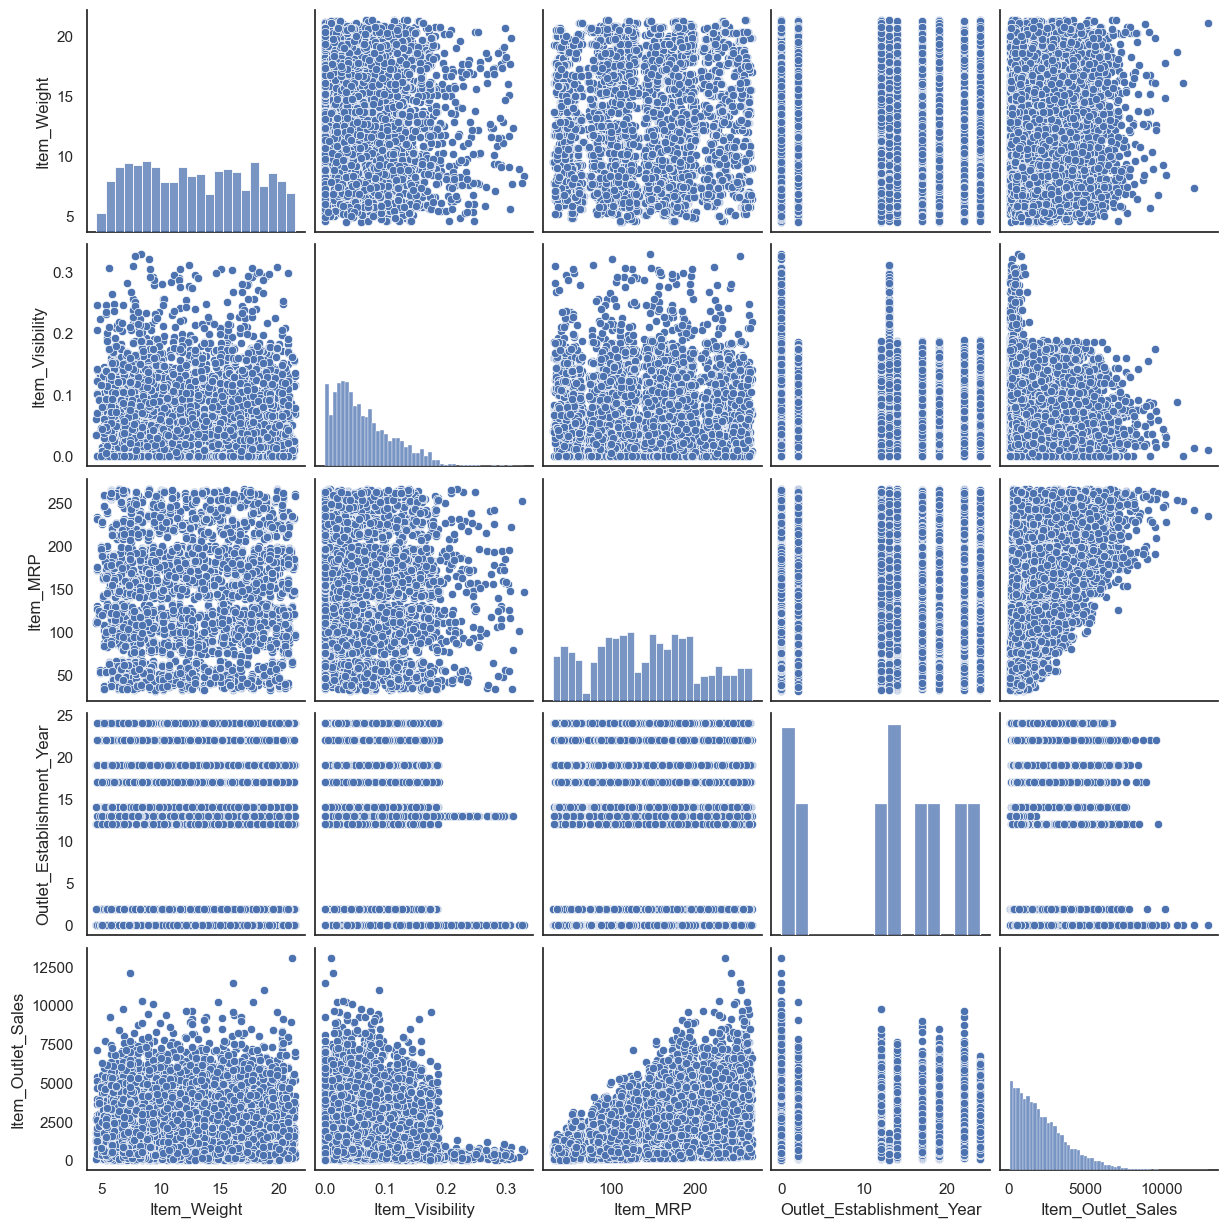

In [64]:
#   Pairplot
sns.pairplot(train_data[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']])
plt.show()

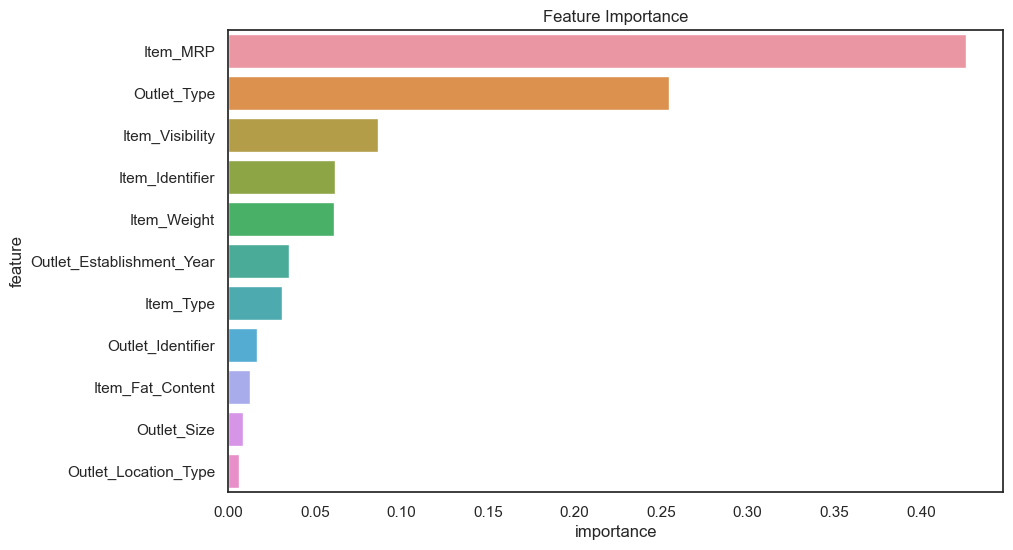

In [65]:
#  Feature Importance using Random Forest
from sklearn.ensemble import RandomForestRegressor

X = train_data.drop('Item_Outlet_Sales', axis=1)
y = train_data['Item_Outlet_Sales']

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

feature_importance = pd.DataFrame({'feature': X.columns, 'importance': rf.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()

In [66]:
#  Advanced ML Techniques - Multiple Models
from sklearn.model_selection import cross_val_score, RepeatedKFold
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import lightgbm as lgb

# Prepare data
X = train_data.drop('Item_Outlet_Sales', axis=1)
y = train_data['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    'XGBoost': xgb.XGBRegressor(random_state=42),
    'LightGBM': lgb.LGBMRegressor(random_state=42)
}

# Cross-validation setup
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)

# Evaluate models
for name, model in models.items():
    scores = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1)
    print(f"{name} - Mean R2: {np.mean(scores):.4f} (+/- {np.std(scores) * 2:.4f})")

# Stacking Ensemble
estimators = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('gbr', GradientBoostingRegressor(random_state=42)),
    ('xgb', xgb.XGBRegressor(random_state=42))
]

stacking_regressor = StackingRegressor(
    estimators=estimators,
    final_estimator=LassoCV()
)

stacking_regressor.fit(X_train, y_train)
stacking_predictions = stacking_regressor.predict(X_test)

mse = mean_squared_error(y_test, stacking_predictions)
r2 = r2_score(y_test, stacking_predictions)

print(f"Stacking Ensemble - MSE: {mse:.2f}, R2: {r2:.2f}")



Linear Regression - Mean R2: 0.5086 (+/- 0.0260)
Random Forest - Mean R2: 0.5600 (+/- 0.0352)
Gradient Boosting - Mean R2: 0.5955 (+/- 0.0337)
XGBoost - Mean R2: 0.5158 (+/- 0.0393)
LightGBM - Mean R2: 0.5751 (+/- 0.0414)
Stacking Ensemble - MSE: 1064996.40, R2: 0.61


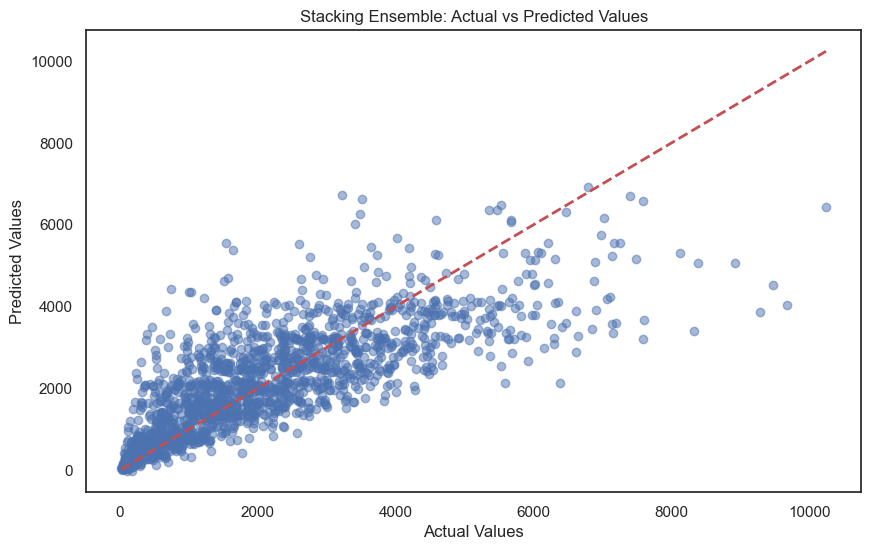

In [67]:
# Visualize predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, stacking_predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Stacking Ensemble: Actual vs Predicted Values')
plt.show()

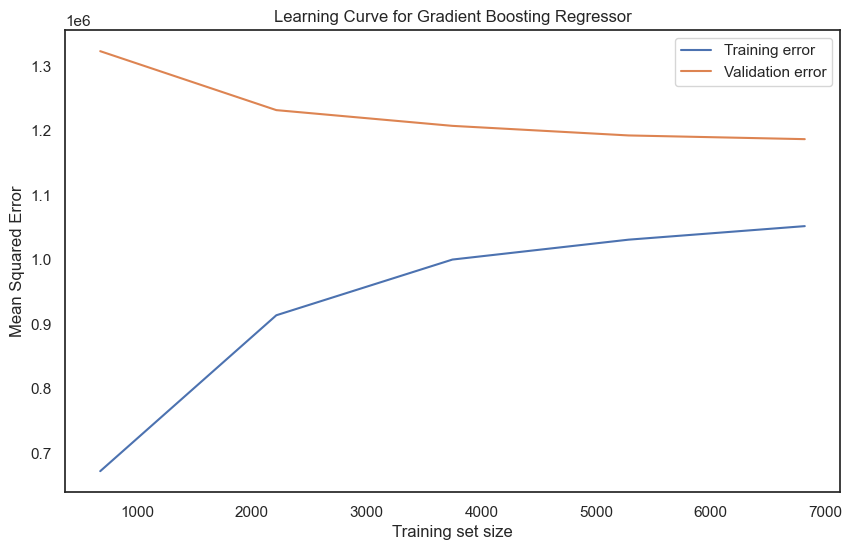

In [68]:
# Learning Curve to Diagnose Bias-Variance Tradeoff
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    GradientBoostingRegressor(random_state=42), X, y, 
    train_sizes=np.linspace(0.1, 1.0, 5), cv=5, n_jobs=-1, scoring="neg_mean_squared_error"
)

train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Training error")
plt.plot(train_sizes, test_scores_mean, label="Validation error")
plt.xlabel("Training set size")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curve for Gradient Boosting Regressor")
plt.legend()
plt.show()

In [69]:
# Advanced Statistical Tests
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

print("Advanced Statistical Tests")

categorical_vars = ['Item_Fat_Content', 'Item_Type', 'Outlet_Type']
for var in categorical_vars:
    groups = [group for _, group in train_data.groupby(var)['Item_Outlet_Sales']]
    f_value, p_value = stats.f_oneway(*groups)
    print(f"ANOVA test for {var}: F-value = {f_value:.2f}, p-value = {p_value:.4f}")

    tukey = pairwise_tukeyhsd(endog=train_data['Item_Outlet_Sales'],
                              groups=train_data[var],
                              alpha=0.05)
    print(tukey)

Advanced Statistical Tests
ANOVA test for Item_Fat_Content: F-value = 1.73, p-value = 0.1412
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower    upper   reject
--------------------------------------------------------
     0      1   90.9254 0.8896 -178.9553 360.8061  False
     0      2  161.6348 0.4981 -114.1882 437.4578  False
     0      3   14.1888    1.0 -497.7324   526.11  False
     0      4 -111.3597 0.9746   -615.14 392.4207  False
     1      2   70.7094 0.3859   -37.731 179.1497  False
     1      3  -76.7366   0.99 -521.4211 367.9479  False
     1      4 -202.2851  0.711 -637.5731 233.0029  False
     2      3  -147.446  0.898 -595.7617 300.8698  False
     2      4 -272.9944  0.436 -711.9914 166.0026  False
     3      4 -125.5485 0.9811 -740.9372 489.8403  False
--------------------------------------------------------
ANOVA test for Item_Type: F-value = 2.70, p-value = 0.0004


C:\Users\Evans Sarker\anaconda3\Lib\site-packages\scipy\integrate\_quadpack_py.py:1233: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff p-adj    lower      upper   reject
----------------------------------------------------------
     0      1   251.161 0.8352   -182.986  685.3081  False
     0      2  158.8374 0.9999  -443.3506  761.0255  False
     0      3  272.2237 0.2268   -52.0722  596.5196  False
     0      4  279.5714 0.1728   -40.7806  599.9234  False
     0      5  179.8965   0.81  -124.1786  483.9717  False
     0      6  336.0384  0.005    52.6595  619.4172   True
     0      7  186.2504 0.9921  -274.1552   646.656  False
     0      8   57.0291    1.0  -286.7771  400.8352  False
     0      9  305.8131 0.0406     5.6503  605.9759   True
     0     10  206.0067 0.8589  -158.4947  570.5081  False
     0     11  -26.8315    1.0  -531.2158  477.5528  False
     0     12  373.0947 0.9543  -392.0505 1138.2399  False
     0     13  324.3505 0.0093    39.6723  609.0287   True
     0     14   53.5405    1.0  -305.9802  413.0613  Fal

In [71]:
# Advanced Feature Engineering
from sklearn.preprocessing import PolynomialFeatures

print("Advanced Feature Engineering")

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(train_data[['Item_MRP', 'Item_Visibility']])

# Use get_feature_names_out() instead of get_feature_names()
poly_feature_names = poly.get_feature_names_out(['Item_MRP', 'Item_Visibility'])

train_data_poly = train_data.copy()
for i, name in enumerate(poly_feature_names):
    train_data_poly[name] = poly_features[:, i]

print("Added polynomial features:", poly_feature_names)

Advanced Feature Engineering
Added polynomial features: ['Item_MRP' 'Item_Visibility' 'Item_MRP^2' 'Item_MRP Item_Visibility'
 'Item_Visibility^2']


Model Interpretability


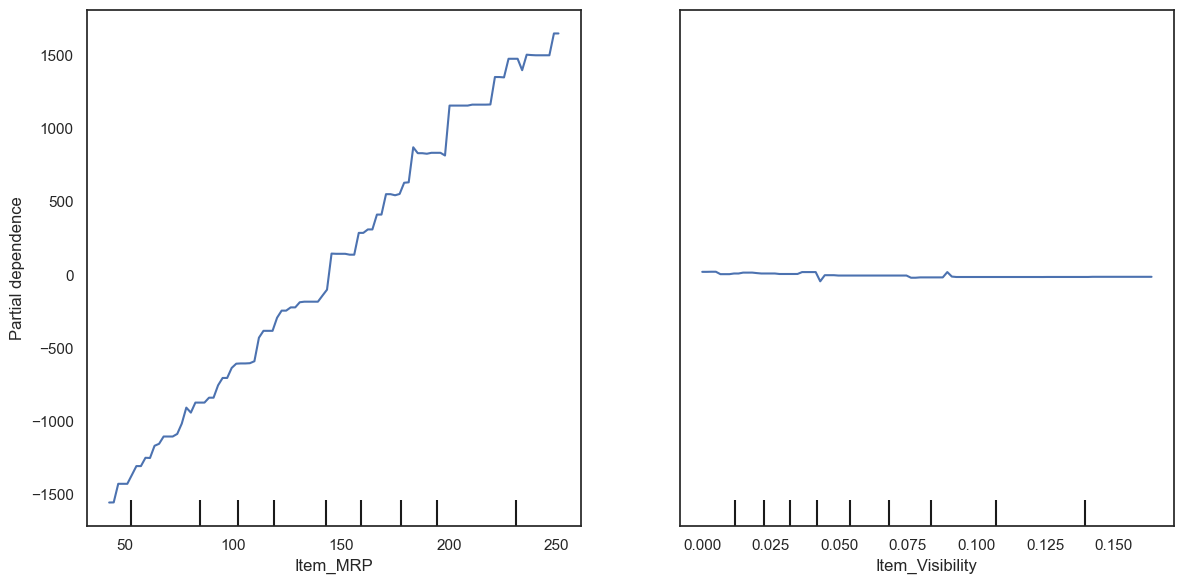

In [72]:
# Model Interpretability
from sklearn.inspection import PartialDependenceDisplay

print("Model Interpretability")

model = GradientBoostingRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

fig, ax = plt.subplots(figsize=(12, 6))
PartialDependenceDisplay.from_estimator(model, X, ['Item_MRP', 'Item_Visibility'], ax=ax)
plt.tight_layout()
plt.show()

In [73]:
# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

print("Hyperparameter Tuning")

param_distributions = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(5, 20),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.6, 0.4),
}

random_search = RandomizedSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_distributions=param_distributions,
    n_iter=20,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42
)

random_search.fit(X, y)

print("Best parameters found:", random_search.best_params_)
print("Best MSE score:", -random_search.best_score_)

Hyperparameter Tuning
Best parameters found: {'learning_rate': 0.13958350559263474, 'max_depth': 5, 'n_estimators': 158, 'subsample': 0.7599443886861021}
Best MSE score: 1320021.0760279647
